# Visualization of the imputations
The imputations made with the STL algorithm in R are visualized here. Run this notebook with a python kernel. The data to be visualized here is the data available from the northwest station.

In [1]:
from pandas import read_csv

In [5]:
#Visualization libraries
from matplotlib import pyplot as plt
from matplotlib import rcParams

In [39]:
figures_path='../images'

In [2]:
allvarsdf=read_csv('../data/Monterrey/processed/northweast_imputations.csv')
pm25nwdf=read_csv('../data/Monterrey/processed/northweast_pm5_decomposed.csv')

## Plotting imputation for Northwest station
Here we keep exploring the imputations for the northwest station.

In [4]:
allvarsdf.loc[:,'date'].head()

0    2011.999886
1    2012.000000
2    2012.000114
3    2012.000228
4    2012.000342
Name: date, dtype: float64

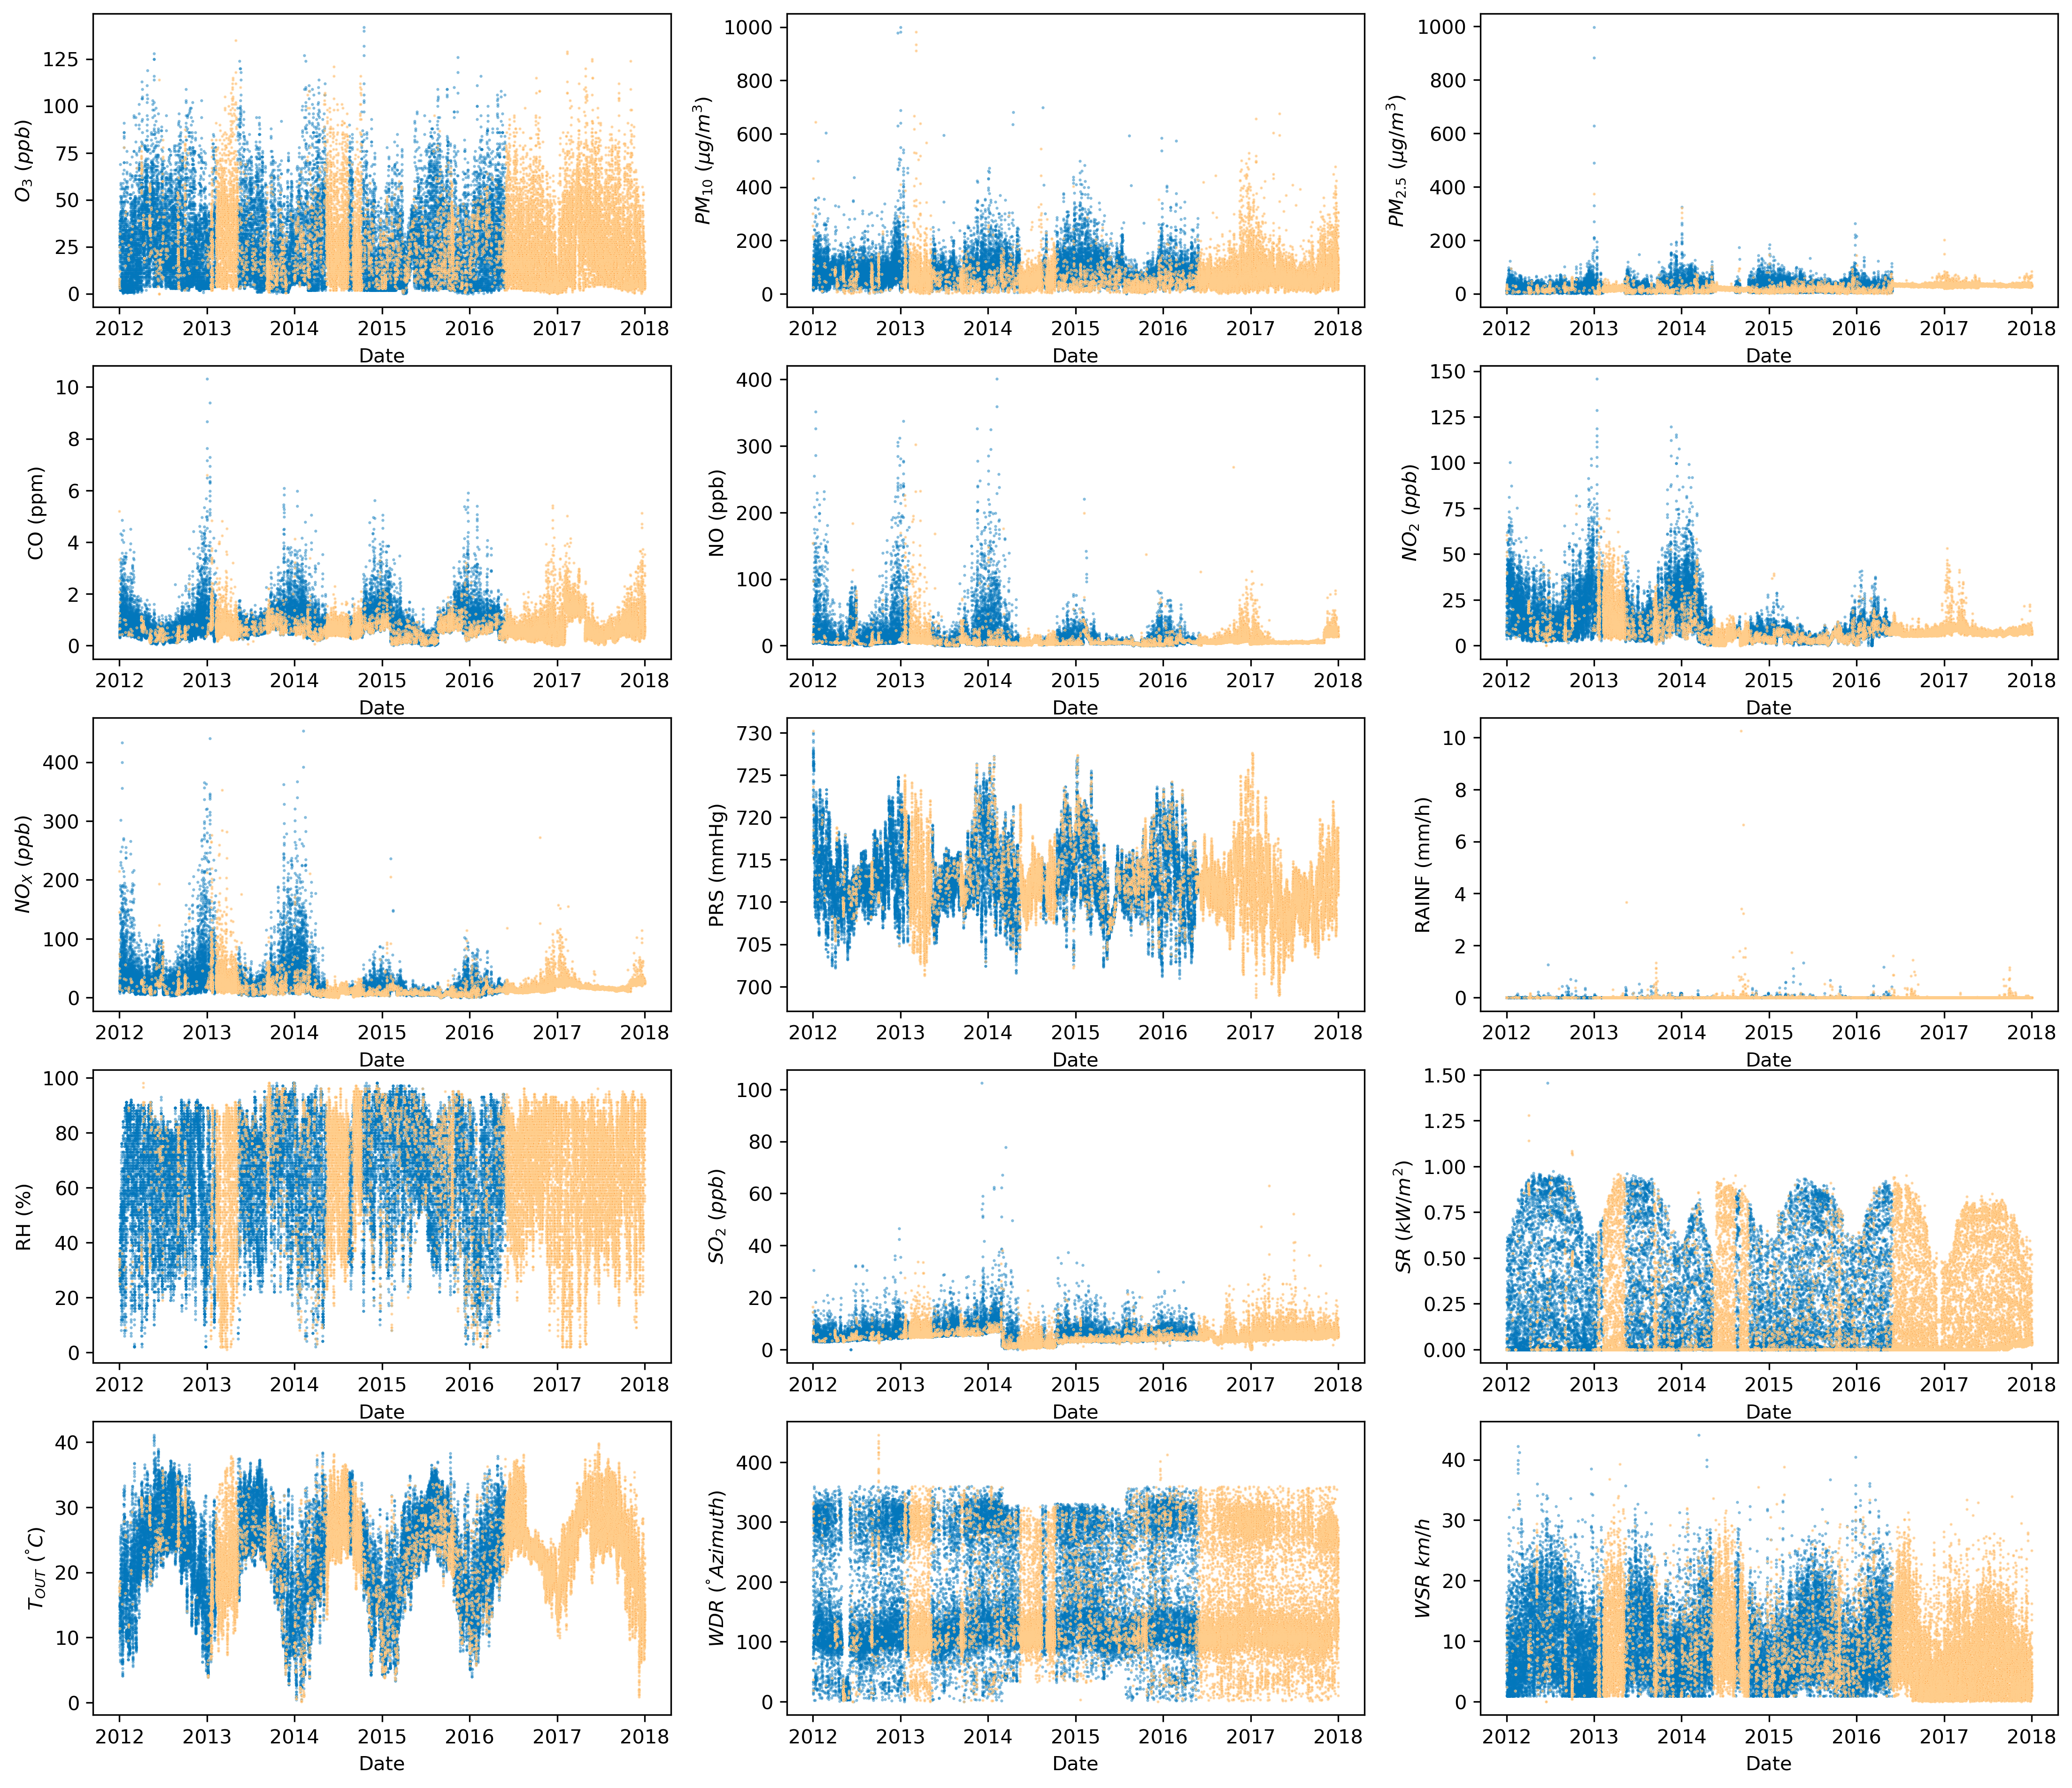

In [45]:
from os import path
rcParams['text.usetex'] = False
fig, axs= plt.subplots(5,3, figsize=(18,16), dpi=300)

var_list=['O3','PM10','PM2.5','CO','NO','NO2','NOX','PRS','RAINF','RH','SO2','SR','TOUT','WDR','WSR']

var_name='PM2.5'

figs_labels=['$O_3\ (ppb)$',
 '$PM_{10}\ (\mu g/m^3)$',
 '$PM_{2.5}\ (\mu g/m^3)$','CO (ppm)',
 'NO (ppb)',
 '$NO_2\ (ppb)$',
 '$NO_X\ (ppb)$',
 'PRS (mmHg)',
 'RAINF (mm/h)',
 'RH (%)',
 '$SO_2\ (ppb)$',
 '$SR\ (kW/m^2)$',
 '$T_{OUT}\ (^{\degree}C)$',
 '$WDR\ (^{\degree} Azimuth)$',
 '$WSR\ km/h$']
c=0
for item in axs:
    for grph in item:        
        x_given=allvarsdf.loc[allvarsdf[var_name+'_miss']!='Missing',['date',var_list[c]]]
        x_imp=allvarsdf.loc[allvarsdf[var_name+'_miss']=='Missing',['date',var_list[c]]]
        grph.plot(x_given.iloc[:,0],x_given.iloc[:,1], **{'ls':'', 'marker':'.', 'ms':1, 'mec':'#0277BD', 'alpha':0.5})
        grph.plot(x_imp.iloc[:,0],x_imp.iloc[:,1], **{'ls':'', 'marker':'.', 'ms':1, 'mec':'#FFCE8C', 'alpha':0.7})
        grph.set_xlabel('Date')
        grph.set_ylabel(figs_labels[c])
        c+=1
rcParams['text.usetex'] = False
fig.savefig(path.join(figures_path,'imputation_data_noroeste.pdf'), format='pdf')
fig.savefig(path.join(figures_path,'imputation_data_noroeste.eps'), format='eps')

In [44]:
fig.savefig(path.join(figures_path,'imputation_data_noroeste.jpg'))

## Visualization of 